## Library import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

## Import data set

In [5]:
df = pd.read_csv('../raw/earthquick/unClean/japan_earthquakes_combined_filtered.csv')
df.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1995-12-30T23:19:36.080Z,27.958,130.181,23.4,3.4,mb,NaN,NaN,NaN,1.0,...,2014-11-07T00:59:31.074Z,"82 km ESE of Naze, Japan",earthquake,NaN,9.9,NaN,2.0,reviewed,us,us
1,1995-12-30T20:45:14.190Z,40.831,143.190,30.1,5.7,mw,NaN,NaN,NaN,1.0,...,2022-04-29T19:51:40.841Z,"off the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
2,1995-12-30T16:15:33.090Z,31.025,140.136,116.9,5.3,mw,NaN,NaN,NaN,0.9,...,2016-11-10T00:19:51.375Z,"Izu Islands, Japan region",earthquake,NaN,NaN,NaN,NaN,reviewed,us,hrv
3,1995-12-30T12:23:13.400Z,25.576,124.919,33.0,5.4,mb,NaN,NaN,NaN,1.3,...,2014-11-07T00:59:30.960Z,northeast of Taiwan,earthquake,NaN,NaN,NaN,27.0,reviewed,us,us
4,1995-12-30T12:17:37.040Z,40.745,143.232,33.0,5.7,mb,NaN,NaN,NaN,1.1,...,2022-04-29T19:51:39.284Z,"off the east coast of Honshu, Japan",earthquake,NaN,NaN,NaN,104.0,reviewed,us,us


## Initial Inspections

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41457 entries, 0 to 41456
Data columns (total 22 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   time             41457 non-null  object 
 1   latitude         41457 non-null  float64
 2   longitude        41457 non-null  float64
 3   depth            41457 non-null  float64
 4   mag              41457 non-null  float64
 5   magType          41457 non-null  object 
 6   nst              22342 non-null  float64
 7   gap              29225 non-null  float64
 8   dmin             12123 non-null  float64
 9   rms              40576 non-null  float64
 10  net              41457 non-null  object 
 11  id               41457 non-null  object 
 12  updated          41457 non-null  object 
 13  place            41457 non-null  object 
 14  type             41457 non-null  object 
 15  horizontalError  10808 non-null  float64
 16  depthError       25275 non-null  float64
 17  magError    

In [7]:
df.isnull().sum()

time                   0
latitude               0
longitude              0
depth                  0
mag                    0
magType                0
nst                19115
gap                12232
dmin               29334
rms                  881
net                    0
id                     0
updated                0
place                  0
type                   0
horizontalError    30649
depthError         16182
magError           29509
magNst              5916
status                 0
locationSource         0
magSource              0
dtype: int64

In [8]:
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,41457.000000,41457.000000,41457.000000,41457.000000,22342.000000,29225.000000,12123.000000,40576.000000,10808.000000,25275.000000,11948.000000,35541.000000
mean,35.073214,139.764770,70.718338,4.480998,64.694029,116.850337,2.066355,0.874852,7.466603,8.504521,0.121401,26.946062
std,6.073930,6.553554,103.820679,0.473305,89.763086,41.615959,1.529863,0.253780,2.443006,7.044144,0.069131,49.389211
min,24.000000,122.000000,0.000000,2.700000,4.000000,8.000000,0.028000,0.040000,1.300000,0.000000,0.020000,1.000000
25%,29.859900,138.852000,21.200000,4.200000,18.000000,92.000000,1.066000,0.700000,5.900000,4.400000,0.071000,4.000000
50%,36.009000,141.616000,35.000000,4.400000,31.000000,121.700000,1.831000,0.860000,7.300000,6.900000,0.107000,11.000000
75%,39.507000,143.232000,60.900000,4.700000,68.000000,136.100000,2.723500,1.030000,8.800000,10.400000,0.157000,28.000000
max,45.500000,153.976200,686.390000,9.100000,929.000000,353.400000,44.036000,1.940000,23.800000,74.100000,0.700000,884.000000


In [9]:
df.shape

(41457, 22)

## Calculate missing value percentages & Plot

In [10]:
missing_percent = df.isnull().mean() * 100
missing_df = pd.DataFrame({'Column': df.columns, 'Missing (%)': missing_percent}).sort_values(by='Missing (%)', ascending=False)

In [12]:
print("\nMissing Value Percentages:\n", missing_df)


Missing Value Percentages:
                           Column  Missing (%)
horizontalError  horizontalError    73.929614
magError                magError    71.179777
dmin                        dmin    70.757653
nst                          nst    46.108016
depthError            depthError    39.033215
gap                          gap    29.505271
magNst                    magNst    14.270208
rms                          rms     2.125093
time                        time     0.000000
place                      place     0.000000
locationSource    locationSource     0.000000
status                    status     0.000000
type                        type     0.000000
id                            id     0.000000
updated                  updated     0.000000
latitude                latitude     0.000000
net                          net     0.000000
magType                  magType     0.000000
mag                          mag     0.000000
depth                      depth     0.000000
longi

<Figure size 640x480 with 0 Axes>

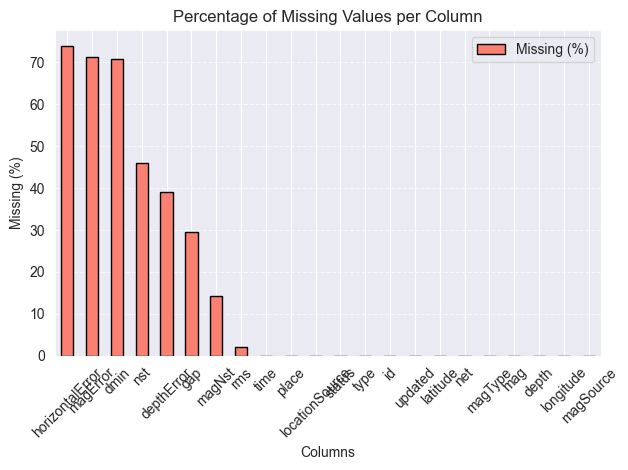

In [13]:
# Plot missing values
plt.figure()
missing_df.plot(kind='bar', x='Column', y='Missing (%)', color='salmon', edgecolor='black')
plt.title('Percentage of Missing Values per Column')
plt.xlabel('Columns')
plt.ylabel('Missing (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


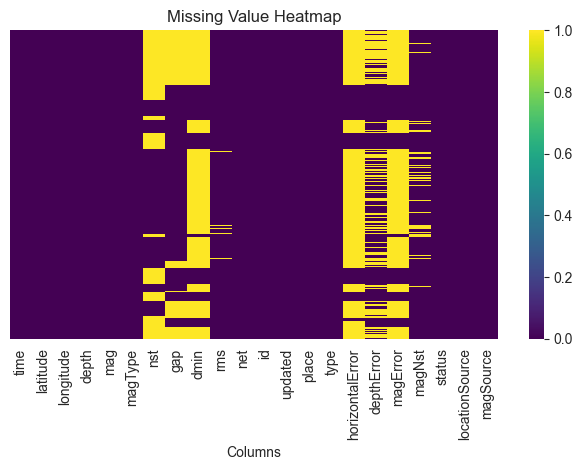

In [14]:
# Heat map plot missing values
plt.figure()
sns.heatmap(df.isnull(), cbar=True, cmap='viridis', yticklabels=False)
plt.title('Missing Value Heatmap')
plt.xlabel('Columns')
plt.tight_layout()
plt.show()

## Drop missing values more than 50%

In [15]:
cols_to_drop = [
    'id',
    'updated',
    'net',
    'place',
    'type',
    'status',
    'locationSource',
    'magSource',
    'dmin',
    'horizontalError',
    'magError'
]

df_clean = df.drop(columns=cols_to_drop)

In [16]:
df_clean.head()

,time,latitude,longitude,depth,mag,magType,nst,gap,rms,depthError,magNst
0,1995-12-30T23:19:36.080Z,27.958,130.181,23.4,3.4,mb,NaN,NaN,1.0,9.9,2.0
1,1995-12-30T20:45:14.190Z,40.831,143.190,30.1,5.7,mw,NaN,NaN,1.0,NaN,NaN
2,1995-12-30T16:15:33.090Z,31.025,140.136,116.9,5.3,mw,NaN,NaN,0.9,NaN,NaN
3,1995-12-30T12:23:13.400Z,25.576,124.919,33.0,5.4,mb,NaN,NaN,1.3,NaN,27.0
4,1995-12-30T12:17:37.040Z,40.745,143.232,33.0,5.7,mb,NaN,NaN,1.1,NaN,104.0


## Plot missing values what keeps after dropped

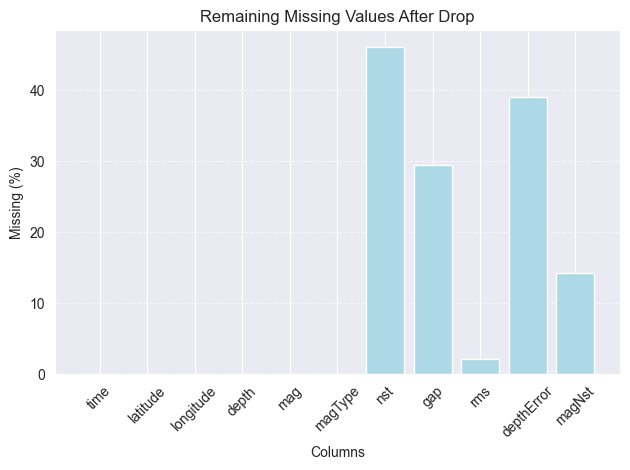

In [19]:
# Calculate remaining missing percentages
missing_percent_clean = df_clean.isnull().mean() * 100
missing_df_clean = pd.DataFrame({'Column': df_clean.columns, 'Missing (%)': missing_percent_clean})

# Simple bar plot
plt.figure()
plt.bar(missing_df_clean['Column'], missing_df_clean['Missing (%)'], color='lightblue')
plt.title('Remaining Missing Values After Drop')
plt.xlabel('Columns')
plt.ylabel('Missing (%)')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()